# Project Title: Customer Segmentation and Marketing Strategy Optimization for an E-commerce Platform
## Introduction
In this project, I am going to walk you through an analysis of the marketing campaign dataset in order to achieve the following:
 - Perform customer segmentation using clustering algorithms to identify distict customer groups
 - Predict customer spending using random forest regression to inform targeted marketing strategies
 - Identify potential factors that might influence customer churn using logistic regression

The main objective of this project is to showcase the use of clustering, random forest regression, and logistic regression in a real-world scenario, aiming to optimize marketing efforts and enhance customer retention for an e-commerce platform.

## Data collection
 - This dataset is from Kaggle and includes the following:
 - ID: Unique identifier for each customer.
 - Year_Birth: Year of birth of the customer.
 - Education: Education level of the customer.
 - Marital_Status: Marital status of the customer.
 - Income: Annual income of the customer.
 - Kidhome: Number of small children in the customer's household.
 - Teenhome: Number of teenagers in the customer's household.
 - Dt_Customer: Date when the customer was enrolled with the company.
 - Recency: Number of days since the last purchase.
 - MntWines: Amount spent on wine in the last 2 years.
- MntFruits: Amount spent on fruits in the last 2 years.
- MntMeatProducts: Amount spent on meat products in the last 2 years.
- MntFishProducts: Amount spent on fish products in the last 2 years.
- MntSweetProducts: Amount spent on sweet products in the last 2 years.
- MntGoldProds: Amount spent on gold products in the last 2 years.
- NumDealsPurchases: Number of purchases made with a discount.
- NumWebPurchases: Number of purchases made through the company's website.
- NumCatalogPurchases: Number of purchases made using a catalog.
- NumStorePurchases: Number of purchases made directly in stores.
- NumWebVisitsMonth: Number of visits to the company's website in the last month.
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise.
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise.
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise.
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise.
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise.
- Complain: 1 if the customer has complained in the last 2 years, 0 otherwise.
- Z_CostContact: Cost per contact (constant value).
- Z_Revenue: Revenue per contact (constant value).
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise.

This dataset provides a comprehensive view of customer interactions and their responses to marketing efforts, allowing for in-depth analysis to optimize marketing strategies and enhance customer retention.

In [4]:
import pandas as pd
data = pd.read_csv('/Users/nathenkhaleghi/Desktop/marketing_campaign.csv', sep='\t')
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning
We begin the data cleaning step of the process, this includes dealing with missing values, duplicates, and making sure all data types are correct.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
#Check for null data points
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
#Check for duplicates
duplicates = data.duplicated().sum()
print(f'Number of dulplicates: {duplicates}')

#Replace unconventional entries
unconventional_status = ['YOLO', 'Absurd']
data['Marital_Status'] = data['Marital_Status'].replace(unconventional_status, 'Unknown')

Number of dulplicates: 0


In [9]:
#Since income is a continuous numerical variable I will impute the missing values with the mean
mean_income = data['Income'].mean()
data = data.fillna({'Income': mean_income})

# Convert columns to appropriate data types
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')
data['Year_Birth'] = pd.to_numeric(data['Year_Birth'], errors='coerce')
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce')

## Exploratory Data Analysis (EDA)
Next, we will be conducting exploratory data analysis to understand trends and patterns within the customer data.

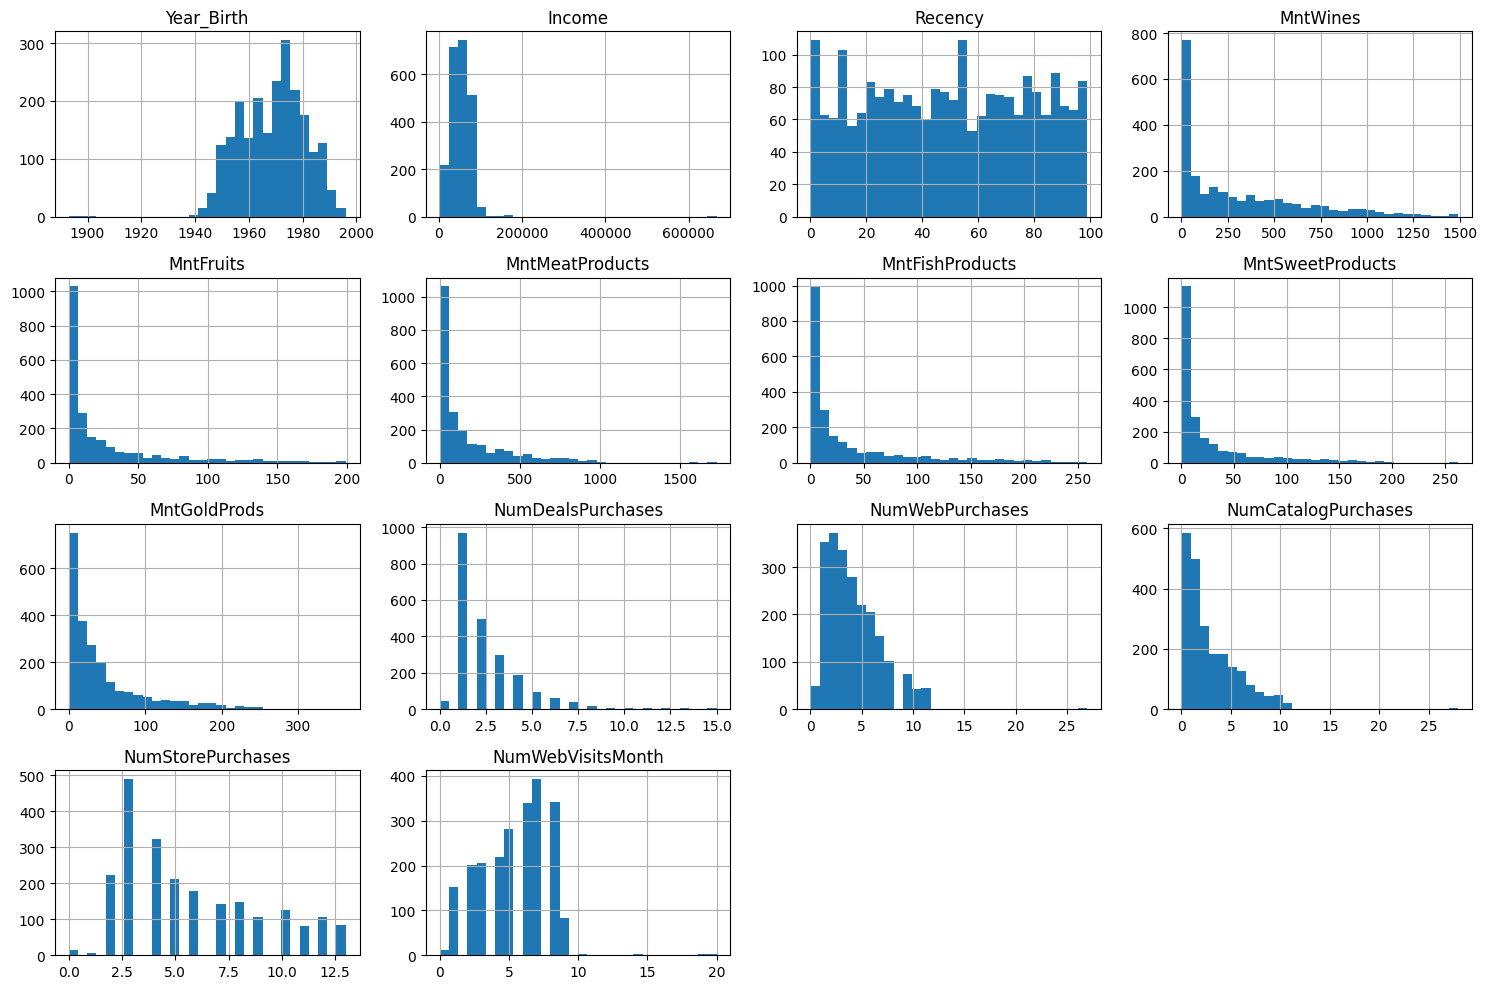

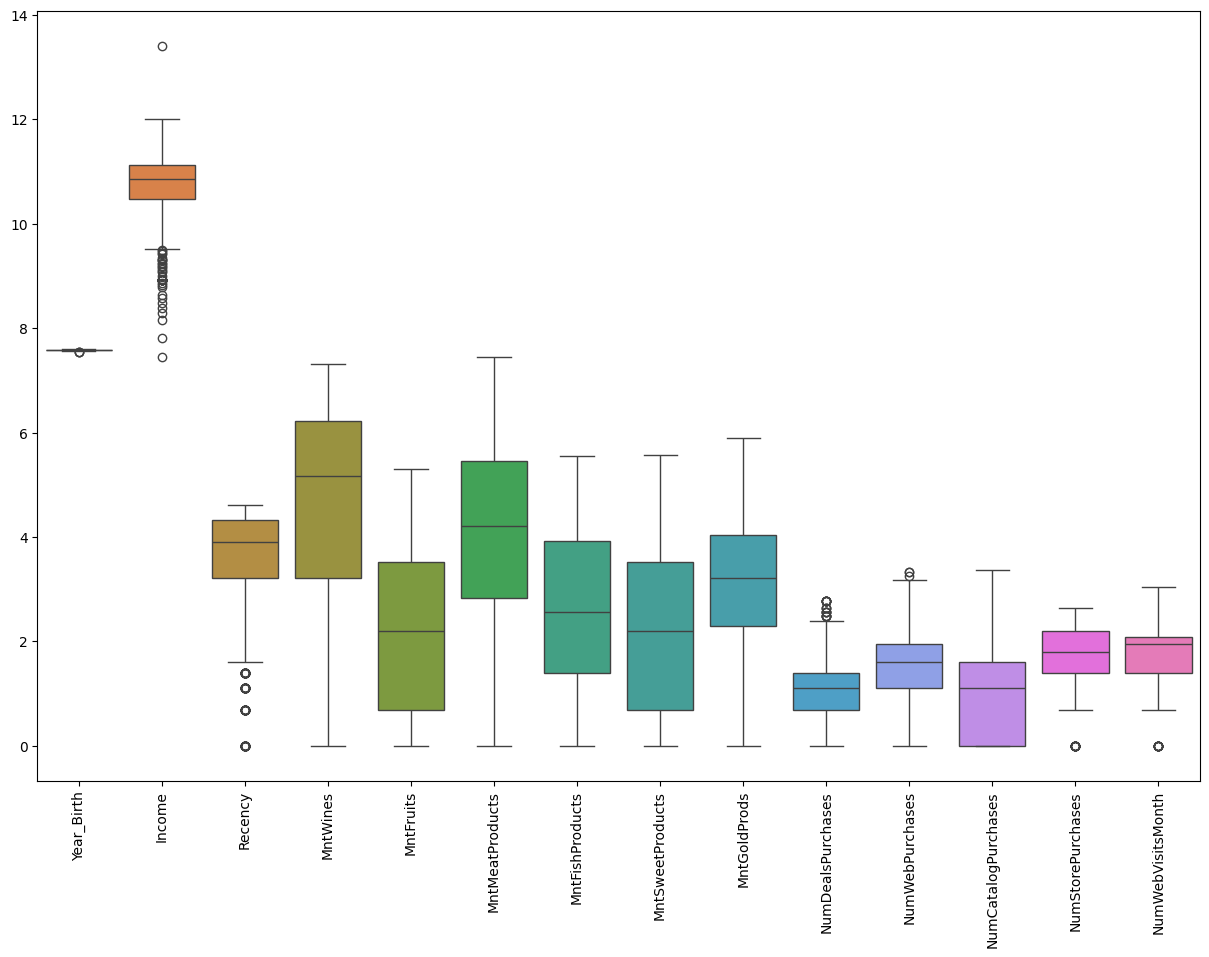

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Histograms of numerical features
numerical_features = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                      'NumStorePurchases', 'NumWebVisitsMonth']

data[numerical_features].hist(bins = 30, figsize=(15, 10))
plt.tight_layout()
plt.show()

#Boxplots for numerical 
df_log_transformed = data[numerical_features].apply(lambda x: np.log1p(x))
plt.figure(figsize = (15, 10))
sns.boxplot(data=df_log_transformed)
plt.xticks(rotation=90)
plt.show()

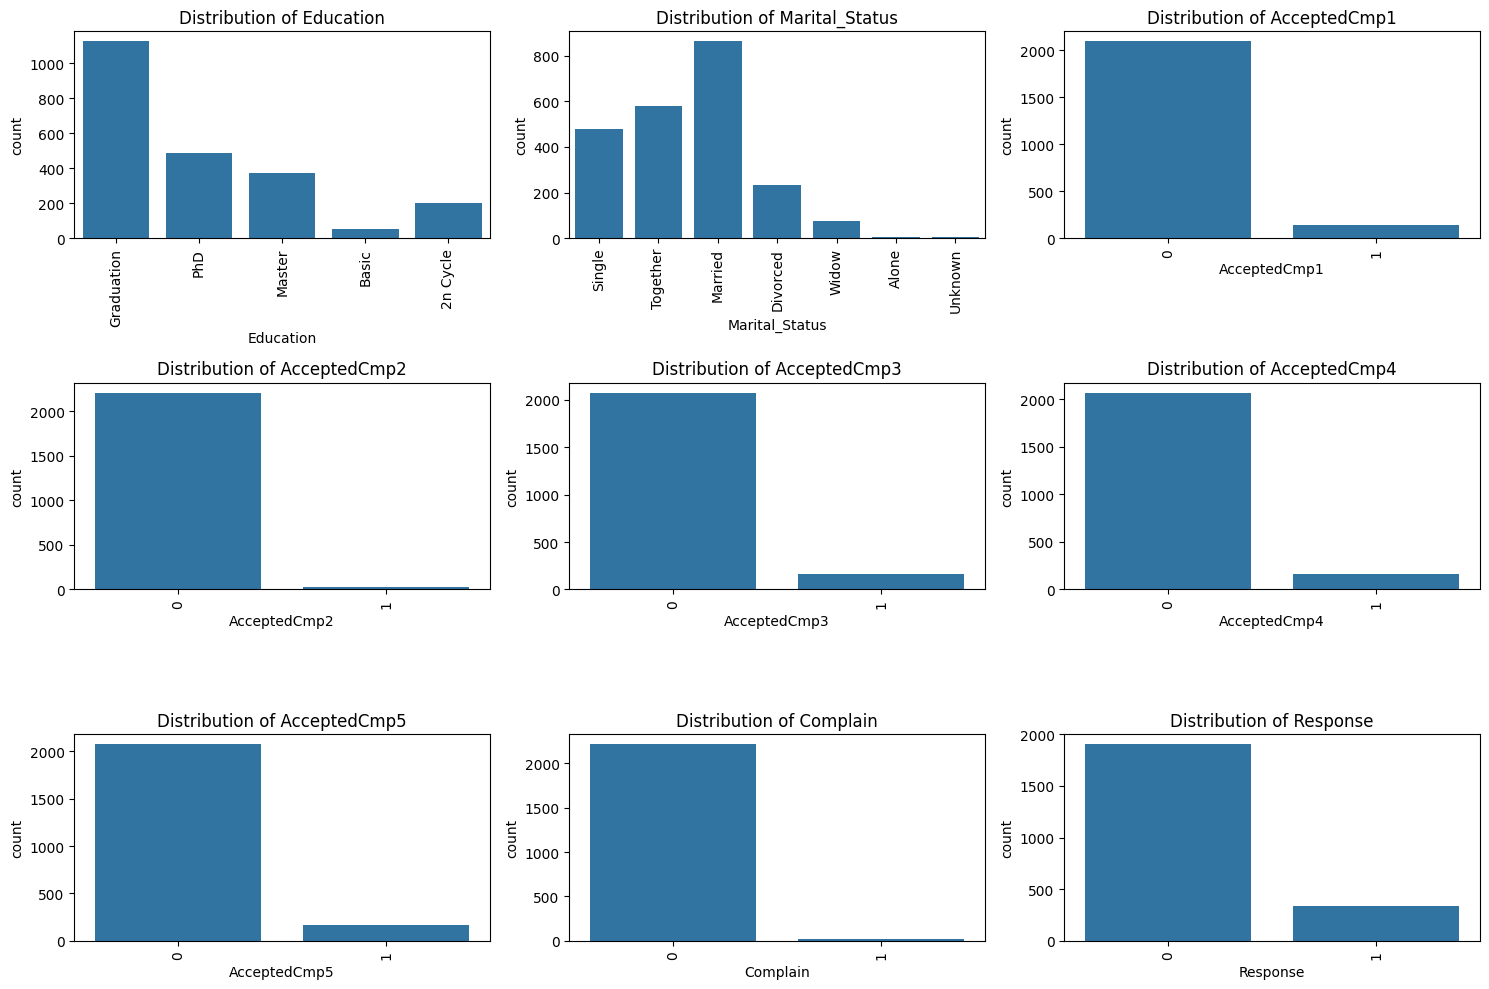

In [11]:
#Barplots for categorical features
categorical_features = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 
                        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
plt.figure(figsize = (15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data = data, x=feature)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

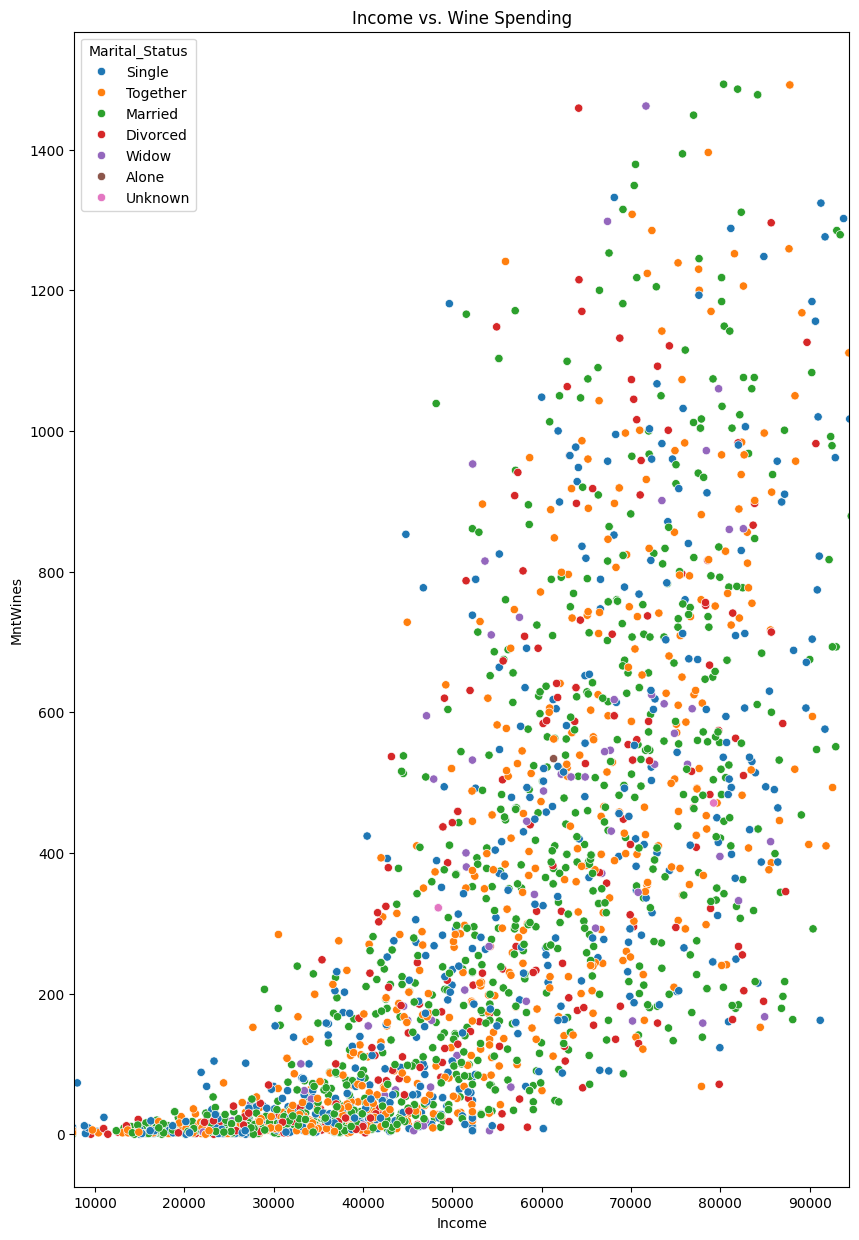

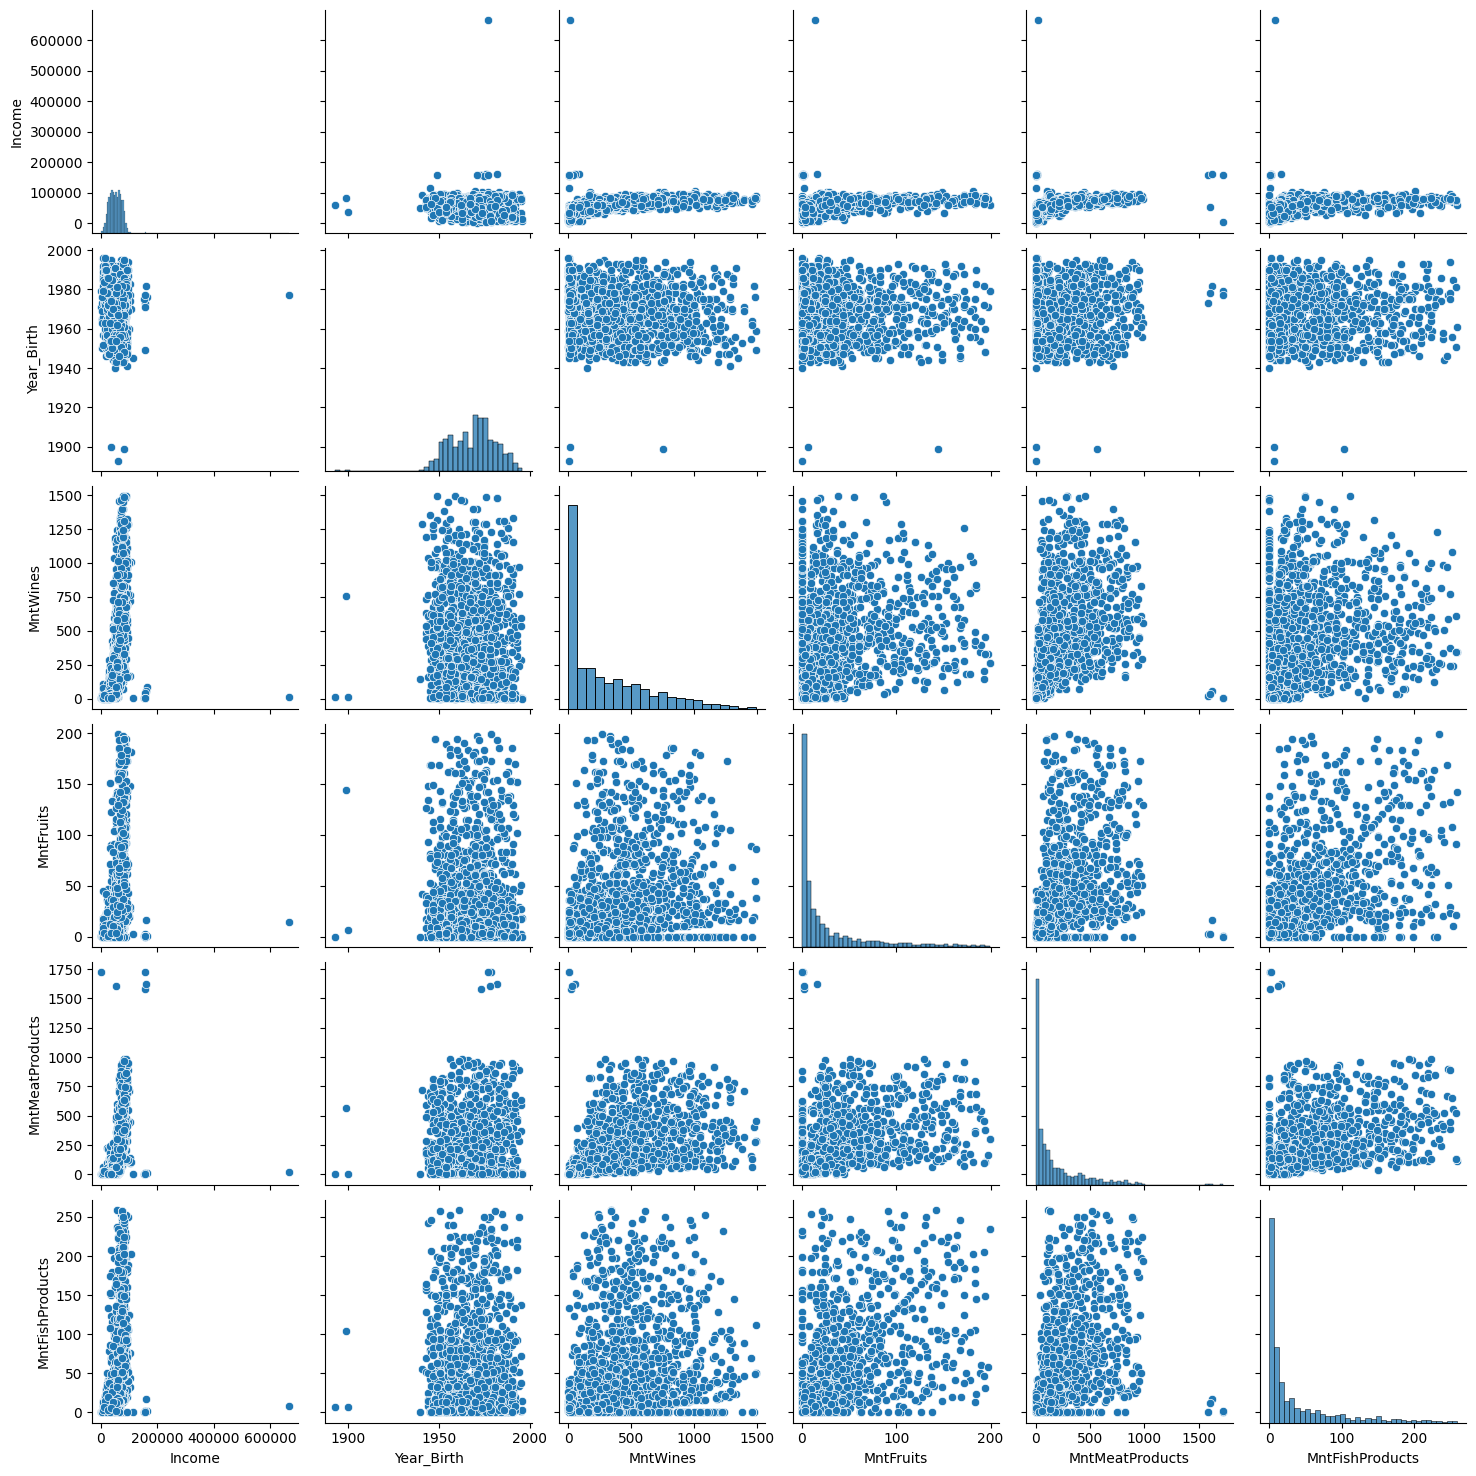

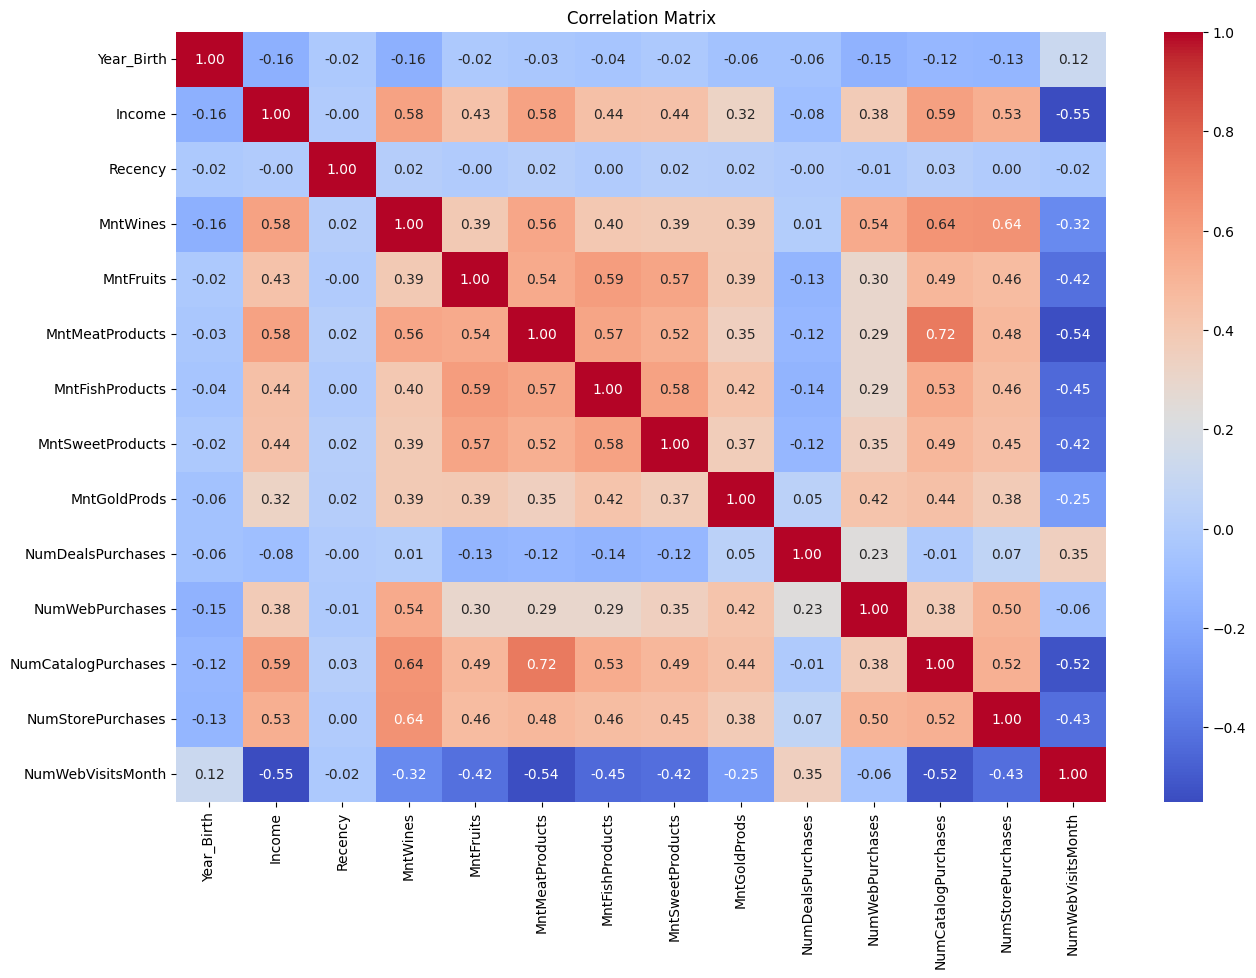

In [12]:
#Scatter plots for key relationships with x-axis limits
plt.figure(figsize=(10, 15))
sns.scatterplot(data=data, x='Income', y='MntWines', hue='Marital_Status')
plt.xlim(data['Income'].quantile(0.01), data['Income'].quantile(0.99))
plt.title('Income vs. Wine Spending')
plt.show()

#Pair plot for a subset of features
sns.pairplot(data[['Income', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']])
plt.show()

#Correlation heatmap
plt.figure(figsize=(15, 10))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot = True, fmt='.2f', cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

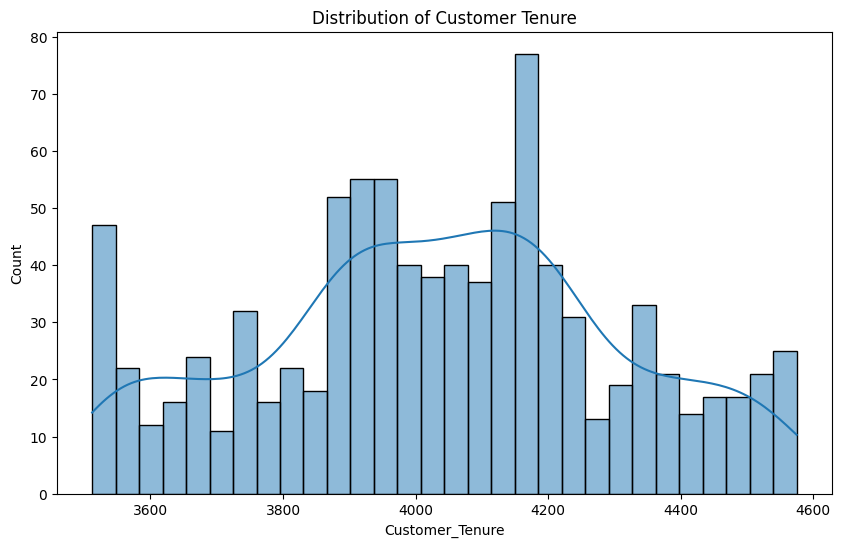

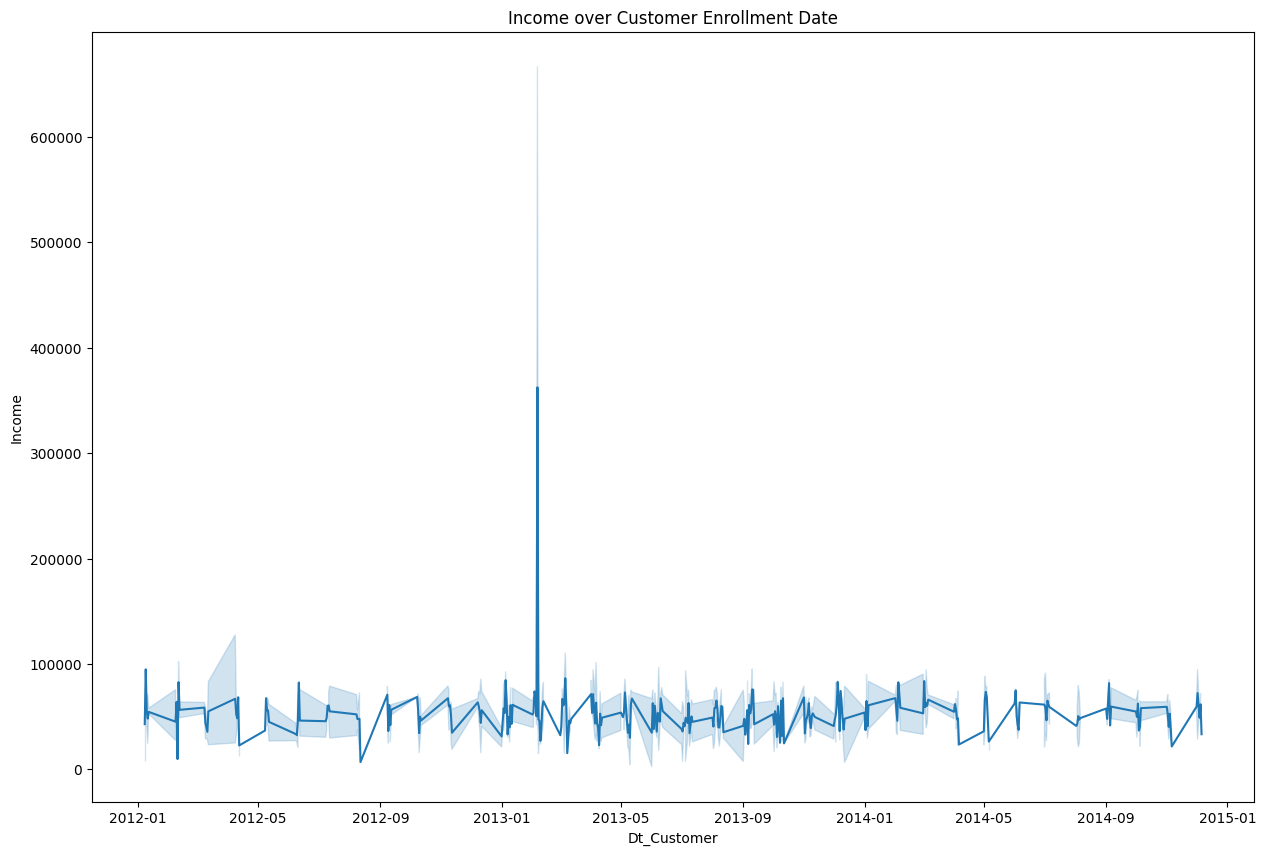

In [13]:
# New feature: customer tenure
data['Customer_Tenure'] = (pd.to_datetime('today') - data['Dt_Customer']).dt.days

# Distribution of customer tenure
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.show()

# Time-based analysis of customer behavior
plt.figure(figsize=(15, 10))
sns.lineplot(data=data, x='Dt_Customer', y='Income')
plt.title('Income over Customer Enrollment Date')
plt.show()


In [14]:
# Key Insights
print("Key Insights from EDA:")
print("1. Distribution of Income: ", data['Income'].describe())
print("2. Top Education Levels: ", data['Education'].value_counts())
print("3. Correlation between Income and Spending: ", corr_matrix['Income'].sort_values(ascending=False))


Key Insights from EDA:
1. Distribution of Income:  count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64
2. Top Education Levels:  Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
3. Correlation between Income and Spending:  Income                 1.000000
NumCatalogPurchases    0.586725
MntMeatProducts        0.577802
MntWines               0.576789
NumStorePurchases      0.526489
MntFishProducts        0.437497
MntSweetProducts       0.436162
MntFruits              0.428747
NumWebPurchases        0.380550
MntGoldProds           0.321978
Recency               -0.003946
NumDealsPurchases     -0.082290
Year_Birth            -0.160942
NumWebVisitsMonth     -0.549824
Name: Income, dtype: float64


## Insights and Trends from EDA
### Summary Statistics
- The average income of the customers is approximately $52,000, with a median income just slightly under that. The distribution is positively skewed, indicating a small number of high-income customers.
- On average, customers spend the most on wine products, followed by meat products. This suggests a preference for these categories among the customer base.

### Distribution Analysis
- The vast majority of customers were born between 1960-1980, implying that majority of the customer base is middle aged.
- Income has several outliers, but the average income is around $50,000 - $60,000, with no extreme jump in frequency for any income groups.

### Relationship Analysis
- As expected, there is a postive linear relationship between income and the amount spent on several of the products, including meat, wine, fish, sweets, fruits, and gold.
- There is a strong correlation between the number of store purchases and the number of web purchases, suggesting customers frequently shop both online and in person.
- According to our scatterplot, marital status has no influence on customer spending and should not be considered a factor.

### Conclusion
The EDA revealed valuable insights into customer demographics and spending patterns. These insights will guide the subsequent steps in customer segmentation, spending prediction, and churn analysis, ensuring that our marketing strategies are well-informed and targeted.



## Clustering
We will now perform customer segmentation using K-means clustering. 

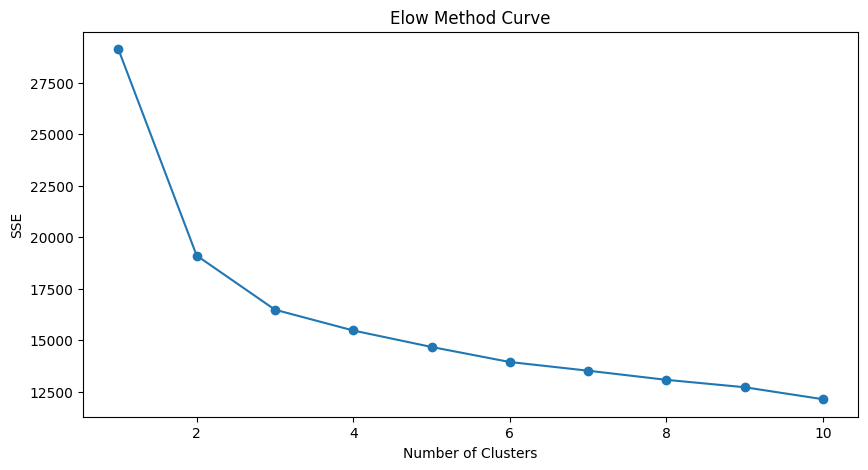

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Total customer spending
data['TotalSpending'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + 
                       data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'])


#Select desired features for clustering
features = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[features])
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

#Plot elbow curve to visualize best # of clusters
plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elow Method Curve')
plt.show()


          Year_Birth        Income    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                      
0        1971.350826  35167.835051   40.394558   4.810496        21.896987   
1        1968.328947  76357.106099  590.863487  69.189145       448.682566   
2        1964.943615  57082.952333  464.353234  19.734660       130.409619   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0               6.730807          5.024295     14.883382           1.958212   
1             100.075658         71.116776     79.059211           1.409539   
2              27.006633         20.252073     58.417910           3.873964   

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster                                                            
0               2.047619             0.550049           3.187561   
1        

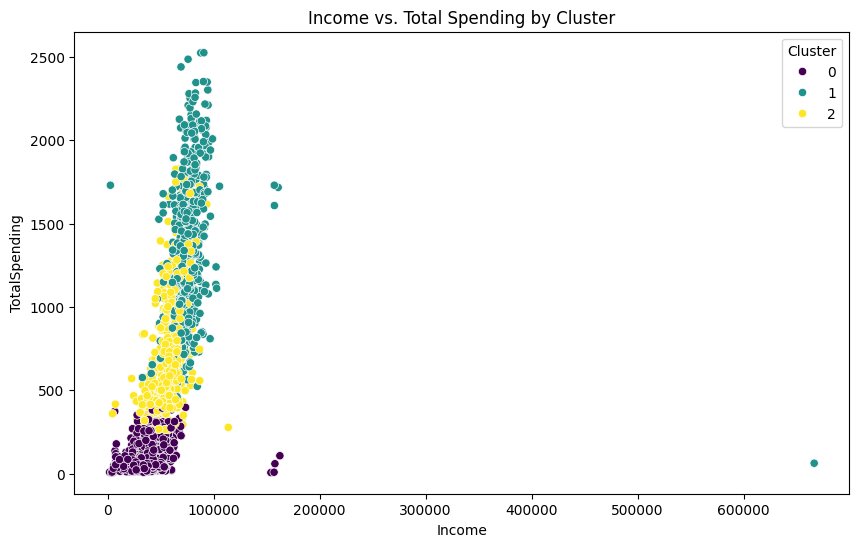

In [23]:
#Apply kmeans with optimal number of clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)
data['Cluster'] = kmeans.fit_predict(df_scaled)
data['Cluster'] = kmeans.labels_

# Summary statistics of each cluster
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)

# Visualize the clusters
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income', y='TotalSpending', hue='Cluster', palette='viridis')
plt.title('Income vs. Total Spending by Cluster')
plt.show()

## Cluster Analysis
- I decided that the appropriate number of cluters was three and applied kmeans clustering. As you can see, when compared with total spending the three clusters are distinctly separated. Cluster one has the lowest spenders followed by cluster two in the middle and ending with cluster one being the highest. These are incredibly valuable because you can see each feature associated with the clusters in order to recognize patterns and analyze your customers spending habits based on key features.
- For example, your lowest spenders in cluster zero are also your youngest and have the lowest income. Although they visit the web more than the other two, they still have the least amount of web purchases. Knowing this you can incorporate strategies on how to increase online spending targeted at lower income, younger people such as deals and promotions that avaible online and marketed to the apprpriate age group.
- You can also see that your highest spending cluster is the one with the highest income, as expected. They spend significaly more on luxury products and while they have a high amount of web purchases, they don't visit the web often. One can infer that if their web visitation increased, web spending would increase as well. This information could lead to strategies on how to attract your best spending cluster to the web more and increase overall spending. 
- Although cluster two is your oldest cluster, the seem to have the largest online presence as far as both visits and spending are concerned. They also have a high amount of store purchases showing that they are a large reliable customer base and strategies should be formulated on retaining and growing this group.

## Random Forest Regression
We will now use random forest regression to help predict customer spending based on various features. This can be used to idenfify high value customers and inform targeted marketing strategies.

Mean Squarred Error: 44044.26930357143
R2 Score: 0.8761285349436942


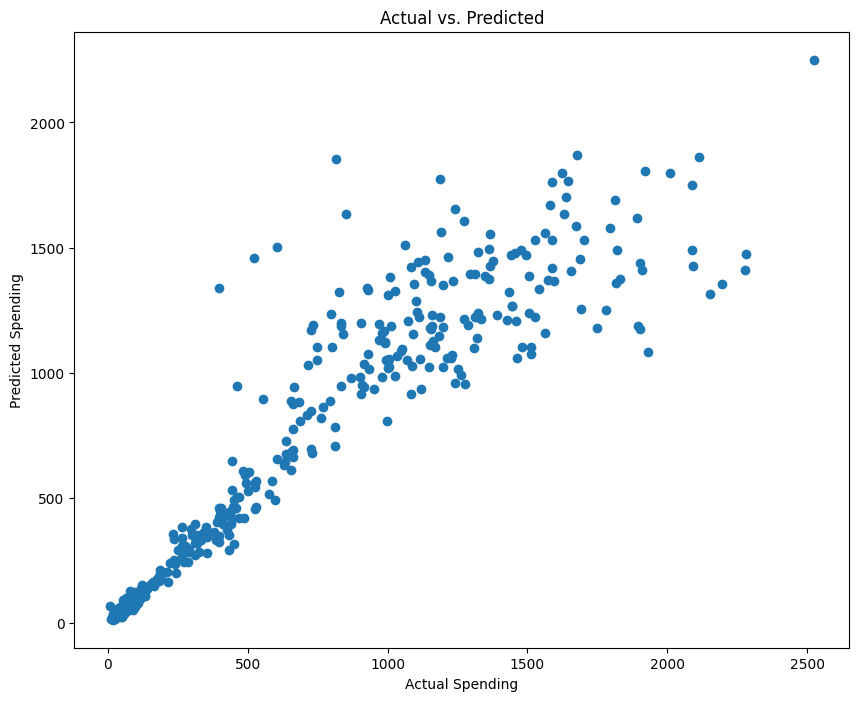

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Create X and y 
features = ['Year_Birth', 'Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth']
X = data[features]
y = data['TotalSpending']

#Scale features in X
X_scaled = scaler.fit_transform(X)

#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size =0.2, random_state = 42)

#train model and create predictions
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squarred Error: {mse}')
print(f'R2 Score: {r2}')

#Visualize predictions
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Spending')
plt.ylabel('Predicted Spending')
plt.show()
           

## Predicting Customer Churn using Logistic Regression
We will use logistic regression to identify factors that influence customer churn.


Accuracy: 0.8482142857142857
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       379
           1       0.52      0.22      0.31        69

    accuracy                           0.85       448
   macro avg       0.69      0.59      0.61       448
weighted avg       0.82      0.85      0.82       448



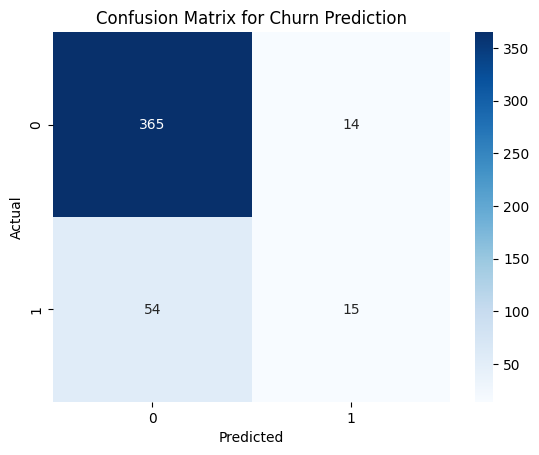

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select features and target variable for churn prediction
churn_features = ['Year_Birth', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
                  'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
churn_target = 'Response'  # Assuming 'Response' indicates whether the customer accepted the last campaign offer

X = data[churn_features]
y = data[churn_target]

#Scaled the data
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Churn Prediction')
plt.show()


## Conclusion
In this project, we conducted a comprehensive analysis of customer data. Our objectives were to segment customers, predict their spending, and identify factors influencing customer churn. The key findings are as follows:
1. **Customer Segmentation**: K-Means clustering identified three distinct customer segments, providing valuable insights into customer behavior and spending patterns.
2. **Spending Prediction**: The Random Forest regression model predicted customer spending with great accuracy.
3. **Churn Prediction**: The logistic regression model effectively identified factors influencing customer churn, achieving an accuracy of 85%.

### Practical Implications
- **Targeted Marketing**: The identified customer segments can be used for personalized marketing campaigns, improving customer engagement and sales.
- **Retention Strategies**: The churn prediction model helps in identifying at-risk customers, allowing for proactive retention strategies to reduce churn rates.
- **Resource Allocation**: Insights from the regression analysis can guide resource allocation, ensuring that high-spending customers receive the attention they deserve.

### Future Work
- **Model Improvement**: Explore advanced models and hyperparameter tuning to improve predictive accuracy.
- **Feature Engineering**: Develop additional features to capture more aspects of customer behavior.
- **Real-Time Analysis**: Implement real-time data analysis to provide timely insights and actions.

This project demonstrates the power of data analysis in understanding and improving customer relationships, ultimately driving business growth.